# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib

# Loading the raw data

### Listings

In [2]:
listings_df = pd.read_csv("../data/raw/chicago_listings.csv.gz", compression="gzip")

In [3]:
listings_df.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2384,https://www.airbnb.com/rooms/2384,20250617145442,2025-06-17,city scrape,Hyde Park - Walk to University of Chicago,Solo Hyde Park visitors are welcome to book th...,The apartment is less than one block from beau...,https://a0.muscache.com/pictures/hosting/Hosti...,2613,...,4.98,4.95,4.94,R17000015609,f,1,0,1,0,1.99
1,7126,https://www.airbnb.com/rooms/7126,20250617145442,2025-06-18,city scrape,Tiny Studio Apartment 94 Walk Score,A very small studio in a wonderful neighborhood.,"Ukrainian Village was just named ""Hottest Neig...",https://a0.muscache.com/pictures/51073/16c81c7...,17928,...,4.88,4.90,4.76,R24000114046,f,1,1,0,0,2.98


In [4]:
listings_df.info

<bound method DataFrame.info of                        id                                       listing_url  \
0                    2384                 https://www.airbnb.com/rooms/2384   
1                    7126                 https://www.airbnb.com/rooms/7126   
2                   10945                https://www.airbnb.com/rooms/10945   
3                   12140                https://www.airbnb.com/rooms/12140   
4                   28749                https://www.airbnb.com/rooms/28749   
...                   ...                                               ...   
8599  1442999473408985878  https://www.airbnb.com/rooms/1442999473408985878   
8600  1443049112706179371  https://www.airbnb.com/rooms/1443049112706179371   
8601  1443390371737395805  https://www.airbnb.com/rooms/1443390371737395805   
8602  1443553474639916674  https://www.airbnb.com/rooms/1443553474639916674   
8603  1444414413460064139  https://www.airbnb.com/rooms/1444414413460064139   

           scrape_i

In [5]:
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

### Reviews

In [6]:
reviews_df = pd.read_csv("../data/raw/chicago_reviews.csv.gz", compression="gzip")

In [7]:
reviews_df.info

<bound method DataFrame.info of                  listing_id                   id        date  reviewer_id  \
0                      2384             25218143  2015-01-09     14385014   
1                      2384             28475392  2015-03-24     16241178   
2                      2384             30974202  2015-04-30     26247321   
3                      2384             31363208  2015-05-04     31293837   
4                      2384             31820011  2015-05-10      2873370   
...                     ...                  ...         ...          ...   
464249  1427510134072840573  1433509276106753285  2025-05-31    392810557   
464250  1427637016160678657  1434229358244390077  2025-06-01     95459412   
464251  1427637016160678657  1437158650823725288  2025-06-05      9129248   
464252  1427637016160678657  1444321176119262439  2025-06-15    152203333   
464253  1428243289027722855  1440781042709112344  2025-06-10    100555658   

       reviewer_name                       

In [8]:
reviews_df.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

# Merge Listings and Reviews

## Merge reviews with listings on listing_id

In [9]:
chicago_reviews = reviews_df.merge(
    listings_df,
    left_on='listing_id',
    right_on='id',
    how='left',
    suffixes=('_review', '_listing')
)

In [12]:
print("Shape after merge:", chicago_reviews.shape)
display(chicago_reviews.head(3))

Shape after merge: (464254, 86)


,listing_id,id_review,date,reviewer_id,reviewer_name,comments,id_listing,listing_url,scrape_id,last_scraped,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_total_reviews
0,2384,25218143,2015-01-09,14385014,Ivan,it's a wonderful trip experience. I didn't exc...,2384,https://www.airbnb.com/rooms/2384,20250617145442,2025-06-17,...,4.95,4.94,R17000015609,f,1,0,1,0,1.99,253
1,2384,28475392,2015-03-24,16241178,Namhaitou,This is my first trip using Airbnb. I was a li...,2384,https://www.airbnb.com/rooms/2384,20250617145442,2025-06-17,...,4.95,4.94,R17000015609,f,1,0,1,0,1.99,253
2,2384,30974202,2015-04-30,26247321,Cristina,Sólo puedo decir cosas buenas de Rebecca. La h...,2384,https://www.airbnb.com/rooms/2384,20250617145442,2025-06-17,...,4.95,4.94,R17000015609,f,1,0,1,0,1.99,253


## Total number of reviews per listing_id

In [13]:
chicago_reviews['listing_total_reviews'] = chicago_reviews.groupby('listing_id')['listing_id'].transform('count')

In [14]:
display(chicago_reviews[['listing_id','listing_total_reviews']].head())

,listing_id,listing_total_reviews
0,2384,253
1,2384,253
2,2384,253
3,2384,253
4,2384,253


## Select relevant columns

In [15]:
chicago_reviews_clean = chicago_reviews[[
    'listing_id', 'id_review', 'date', 'reviewer_id', 'reviewer_name', 'comments',
    'name', 'property_type', 'room_type', 'neighbourhood_cleansed',
    'latitude', 'longitude', 'host_id', 'host_total_listings_count',
    'host_name', 'number_of_reviews', 'review_scores_rating',
    'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location', 'review_scores_value',
    'accommodates', 'bedrooms', 'beds', 'price', 'listing_total_reviews'
]].copy()

## Add city + establishment type

In [16]:
chicago_reviews_clean['city'] = 'Chicago'
chicago_reviews_clean['establishment_type'] = 'Airbnb Accommodation'

In [17]:
chicago_reviews_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464254 entries, 0 to 464253
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   464254 non-null  int64  
 1   id_review                    464254 non-null  int64  
 2   date                         464254 non-null  object 
 3   reviewer_id                  464254 non-null  int64  
 4   reviewer_name                464254 non-null  object 
 5   comments                     464105 non-null  object 
 6   name                         464254 non-null  object 
 7   property_type                464254 non-null  object 
 8   room_type                    464254 non-null  object 
 9   neighbourhood_cleansed       464254 non-null  object 
 10  latitude                     464254 non-null  float64
 11  longitude                    464254 non-null  float64
 12  host_id                      464254 non-null  int64  
 13 

In [18]:
chicago_reviews_clean.head()

,listing_id,id_review,date,reviewer_id,reviewer_name,comments,name,property_type,room_type,neighbourhood_cleansed,...,review_scores_communication,review_scores_location,review_scores_value,accommodates,bedrooms,beds,price,listing_total_reviews,city,establishment_type
0,2384,25218143,2015-01-09,14385014,Ivan,it's a wonderful trip experience. I didn't exc...,Hyde Park - Walk to University of Chicago,Private room in condo,Private room,Hyde Park,...,4.98,4.95,4.94,1,1.0,1.0,$113.00,253,Chicago,Airbnb Accommodation
1,2384,28475392,2015-03-24,16241178,Namhaitou,This is my first trip using Airbnb. I was a li...,Hyde Park - Walk to University of Chicago,Private room in condo,Private room,Hyde Park,...,4.98,4.95,4.94,1,1.0,1.0,$113.00,253,Chicago,Airbnb Accommodation
2,2384,30974202,2015-04-30,26247321,Cristina,Sólo puedo decir cosas buenas de Rebecca. La h...,Hyde Park - Walk to University of Chicago,Private room in condo,Private room,Hyde Park,...,4.98,4.95,4.94,1,1.0,1.0,$113.00,253,Chicago,Airbnb Accommodation
3,2384,31363208,2015-05-04,31293837,SuJung,Rebecca was an absolutely wonderful host.\r<br...,Hyde Park - Walk to University of Chicago,Private room in condo,Private room,Hyde Park,...,4.98,4.95,4.94,1,1.0,1.0,$113.00,253,Chicago,Airbnb Accommodation
4,2384,31820011,2015-05-10,2873370,Krishanu,Rebecca really tried to make it feel like home...,Hyde Park - Walk to University of Chicago,Private room in condo,Private room,Hyde Park,...,4.98,4.95,4.94,1,1.0,1.0,$113.00,253,Chicago,Airbnb Accommodation


# Annual analysis and period selection

## Convert review date to datetime

In [19]:
chicago_reviews_clean['date'] = pd.to_datetime(
    chicago_reviews_clean['date'], errors='coerce'
)

In [20]:
print(chicago_reviews_clean['date'].dtype)

datetime64[ns]


In [21]:
chicago_reviews_clean['visit_date'] = chicago_reviews_clean['date']

## Extract year

In [22]:
chicago_reviews_clean['year'] = chicago_reviews_clean['date'].dt.year

## Count reviews per year

In [23]:
reviews_per_year = chicago_reviews_clean['year'].value_counts().sort_index()

In [24]:
print(reviews_per_year)

year
2009         8
2010        23
2011        62
2012       367
2013       930
2014      2076
2015      4980
2016     10149
2017     16629
2018     28053
2019     38345
2020     19203
2021     42809
2022     64215
2023     80977
2024    107257
2025     48171
Name: count, dtype: int64


## Visualisation

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Filter years 2014-2025
df = chicago_reviews_clean[(chicago_reviews_clean['year'] >= 2014) & (chicago_reviews_clean['year'] <= 2025)].copy()

# Ensure 'date' is datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Create season column
def get_season(date):
    if pd.isna(date):
        return None
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['date'].apply(get_season)
df['combined'] = 'Combined'

# Optional: sample 50k rows to avoid memory issues
df_sample = df.sample(n=50000, random_state=42)

In [27]:
def plot_season_timeline(data, property_type_col='property_type', date_col='date'):
    types = data[property_type_col].dropna().unique().tolist()
    types = types[:2] 
    types.append('Combined')
    
    fig, axes = plt.subplots(nrows=len(types), ncols=2, figsize=(14, 5*len(types)))
    
    if len(types) == 1:
        axes = [axes]  # for one type
    
    for i, t in enumerate(types):
        ax_bar, ax_line = axes[i, 0], axes[i, 1]
        
        # Filter by type
        if t == 'Combined':
            subset = data.copy()
        else:
            subset = data[data[property_type_col] == t]
        
        # Seasonal distribution
        season_counts = subset['season'].value_counts().reindex(['Winter','Spring','Summer','Fall']).fillna(0)
        season_percent = season_counts / season_counts.sum() * 100
        
        # Bar chart
        ax_bar.bar(season_counts.index, season_counts.values, color=['lightblue','steelblue','indianred','orange'])
        for j, v in enumerate(season_counts.values):
            ax_bar.text(j, v + max(season_counts.values)*0.01, f"{v}\n({season_percent.iloc[j]:.1f}%)",
                        ha='center', fontweight='bold')
        ax_bar.set_title(f'{t} - Seasonal Distribution')
        ax_bar.set_ylabel('Number of Reviews')
        
       # Line chart by month
        monthly_counts = subset.groupby(pd.Grouper(key=date_col, freq='ME')).size()
        ax_line.plot(monthly_counts.index, monthly_counts.values, color='steelblue')
        ax_line.fill_between(monthly_counts.index, monthly_counts.values, color='steelblue', alpha=0.2)
        ax_line.set_title(f'{t} - Timeline')
        ax_line.set_ylabel('Reviews per Month')
    
    plt.suptitle('Seasonal Review Distribution and Timeline (2014-2025)', fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

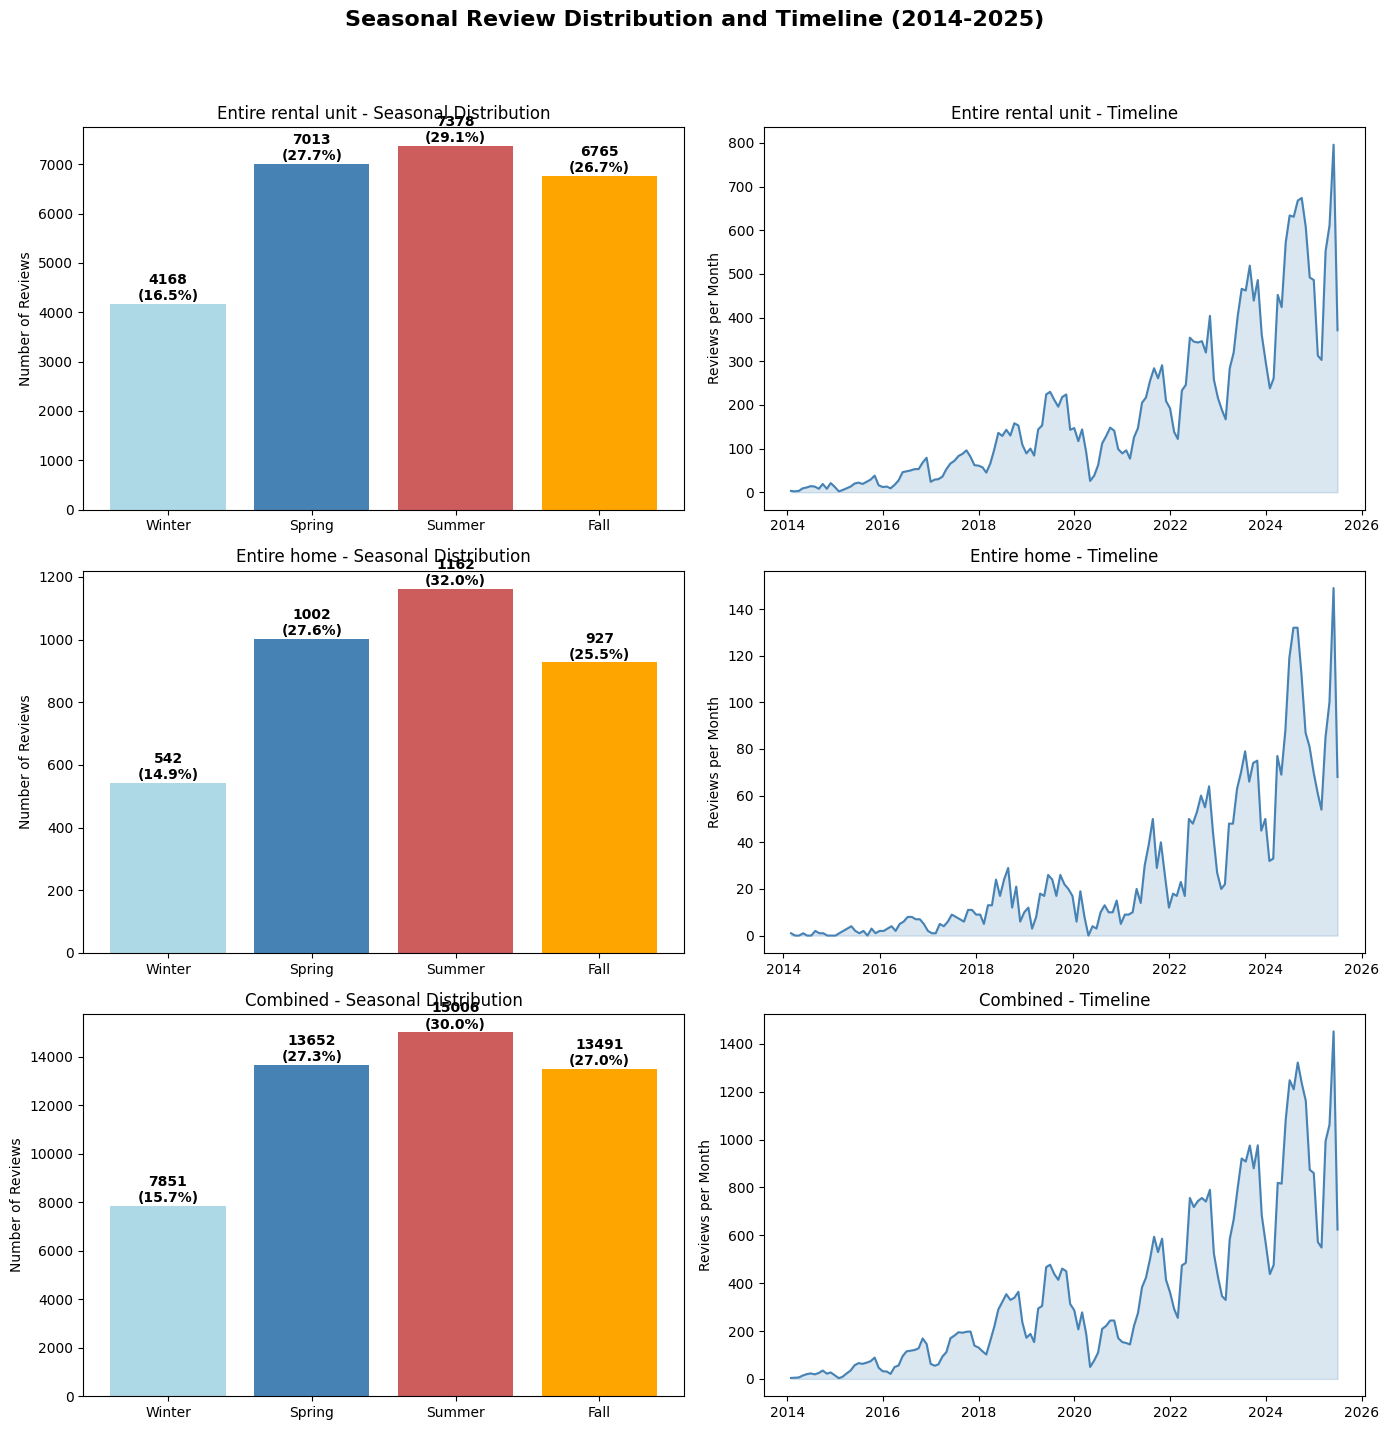

In [28]:
plot_season_timeline(df_sample)

# Filtering by year and language (English reviews)

## ENGLISH REVIEWS ONLY

In [29]:
import fasttext
import pandas as pd
from tqdm import tqdm

FastText model

In [30]:
model = fasttext.load_model("lid.176.ftz")

Language detection function

In [31]:
def detect_language(text):
    if not isinstance(text, str) or not text.strip():
        return None
    label = model.predict(text.replace("\n", " "))[0][0]
    return label.replace("__label__", "")

The date is in datetime format

In [32]:
chicago_reviews_clean['date'] = pd.to_datetime(chicago_reviews_clean['date'])

In [33]:
chicago_reviews_clean_orig = chicago_reviews_clean.copy()

## FILTER YEAR 2024

In [34]:
year_to_filter = 2024
reviews_2024 = chicago_reviews_clean_orig.loc[
    chicago_reviews_clean_orig['date'].dt.year == year_to_filter
].copy()
print(f"Number of reviews in {year_to_filter}: {len(reviews_2024)}")

Number of reviews in 2024: 107257


Determine the language by batches

In [35]:
batch_size = 50000
languages = []

for i in tqdm(range(0, len(reviews_2024), batch_size), desc="Detecting language 2024"):
    batch = reviews_2024.iloc[i:i+batch_size]
    batch_langs = batch["comments"].apply(detect_language).tolist()
    languages.extend(batch_langs)

reviews_2024["language"] = languages

Detecting language 2024: 100%|█████████████████████████████████████████████████████████████████████████| 3/3 [00:06<00:00,  2.11s/it]


Leave only English reviews

In [36]:
reviews_2024 = reviews_2024.loc[reviews_2024["language"] == "en"].copy()
print(f"Number of English reviews in {year_to_filter}: {len(reviews_2024)}")

Number of English reviews in 2024: 101672


In [37]:
Chicago_reviews_2024 = reviews_2024
Chicago_reviews_2024['city'] = 'Chicago'
Chicago_reviews_2024.head()

,listing_id,id_review,date,reviewer_id,reviewer_name,comments,name,property_type,room_type,neighbourhood_cleansed,...,accommodates,bedrooms,beds,price,listing_total_reviews,city,establishment_type,visit_date,year,language
427,2384,1066805518164369826,2024-01-11,66242769,Cheryl,A beautiful apartment with vintage hardware. C...,Hyde Park - Walk to University of Chicago,Private room in condo,Private room,Hyde Park,...,1,1.0,1.0,$113.00,253,Chicago,Airbnb Accommodation,2024-01-11,2024,en
428,2384,1096541827736954530,2024-02-21,365979132,Fred,I thoroughly enjoyed my stay. Rebecca was supe...,Hyde Park - Walk to University of Chicago,Private room in condo,Private room,Hyde Park,...,1,1.0,1.0,$113.00,253,Chicago,Airbnb Accommodation,2024-02-21,2024,en
429,2384,1100893422185999165,2024-02-27,11840900,Michelle,This Airbnb listing is accurately described an...,Hyde Park - Walk to University of Chicago,Private room in condo,Private room,Hyde Park,...,1,1.0,1.0,$113.00,253,Chicago,Airbnb Accommodation,2024-02-27,2024,en
430,2384,1110945041233735254,2024-03-12,562908443,Mirjana,I was happy with everything offered no compl...,Hyde Park - Walk to University of Chicago,Private room in condo,Private room,Hyde Park,...,1,1.0,1.0,$113.00,253,Chicago,Airbnb Accommodation,2024-03-12,2024,en
431,2384,1129752866895117254,2024-04-07,25190107,Dhanushka,It was like meeting an old friend. Rebecca wen...,Hyde Park - Walk to University of Chicago,Private room in condo,Private room,Hyde Park,...,1,1.0,1.0,$113.00,253,Chicago,Airbnb Accommodation,2024-04-07,2024,en


## Filter Year 2022

In [38]:
year_to_filter = 2022
reviews_2022 = chicago_reviews_clean_orig.loc[
    chicago_reviews_clean_orig['date'].dt.year == year_to_filter
].copy()
print(f"Number of reviews in {year_to_filter}: {len(reviews_2022)}")

Number of reviews in 2022: 64215


In [39]:
batch_size = 50000
languages = []

for i in tqdm(range(0, len(reviews_2022), batch_size), desc="Detecting language 2022"):
    batch = reviews_2022.iloc[i:i+batch_size]
    batch_langs = batch["comments"].apply(detect_language).tolist()
    languages.extend(batch_langs)

reviews_2022["language"] = languages

Detecting language 2022: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.90s/it]


In [40]:
Chicago_reviews_2022 = reviews_2022.loc[reviews_2022["language"] == "en"].copy()
Chicago_reviews_2022['city'] = 'Chicago' 
print(f"Number of English reviews in {year_to_filter}: {len(Chicago_reviews_2022)}")

Number of English reviews in 2022: 62396


In [41]:
import pyarrow as pa
import pyarrow.parquet as pq
import os

def save_parquet_in_chunks(df, output_file, chunksize=100_000):
    """Save a DataFrame to Parquet in chunks to avoid memory issues."""
    # If file exists, remove it
    if os.path.exists(output_file):
        os.remove(output_file)
    
    writer = None
    for i in range(0, len(df), chunksize):
        chunk = df.iloc[i:i+chunksize]
        table = pa.Table.from_pandas(chunk)
        
        if writer is None:
            writer = pq.ParquetWriter(output_file, table.schema)
        
        writer.write_table(table)
    
    if writer:
        writer.close()
    print(f"✅ {output_file} successfully saved in chunks")

### SAVE THE OUTPUT FILES

In [42]:
save_parquet_in_chunks(Chicago_reviews_2024, "../data/processed/Chicago_reviews_2024.parquet")
save_parquet_in_chunks(Chicago_reviews_2022, "../data/processed/Chicago_reviews_2022.parquet")

✅ ../data/processed/Chicago_reviews_2024.parquet successfully saved in chunks
✅ ../data/processed/Chicago_reviews_2022.parquet successfully saved in chunks


# Load saved Parquet files

In [82]:
import pandas as pd

Chicago_reviews_2022 = pd.read_parquet("../data/processed/Chicago_reviews_2022.parquet")
Chicago_reviews_2024 = pd.read_parquet("../data/processed/Chicago_reviews_2024.parquet")

print(Chicago_reviews_2022.shape, Chicago_reviews_2024.shape)
Chicago_reviews_2022.head(2)

(62396, 33) (101672, 33)


,listing_id,id_review,date,reviewer_id,reviewer_name,comments,name,property_type,room_type,neighbourhood_cleansed,...,accommodates,bedrooms,beds,price,listing_total_reviews,city,establishment_type,visit_date,year,language
388,2384,586965224423501101,2022-03-20,153590859,Kate,Cozy vintage apt minutes away from U of Chicag...,Hyde Park - Walk to University of Chicago,Private room in condo,Private room,Hyde Park,...,1,1.0,1.0,$113.00,253,Chicago,Airbnb Accommodation,2022-03-20,2022,en
389,2384,602122194996963035,2022-04-10,103271804,Patricia,The host offers the perfect combination of hel...,Hyde Park - Walk to University of Chicago,Private room in condo,Private room,Hyde Park,...,1,1.0,1.0,$113.00,253,Chicago,Airbnb Accommodation,2022-04-10,2022,en


# Adding seasons (winter/spring/summer/fall)

Function for determining the season by month

In [43]:
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

## For 2024

In [44]:
Chicago_reviews_2024['month'] = Chicago_reviews_2024['date'].dt.month
Chicago_reviews_2024['season'] = Chicago_reviews_2024['month'].apply(month_to_season)

print("Seasonal distribution for 2024:")
print(Chicago_reviews_2024['season'].value_counts())

Seasonal distribution for 2024:
season
Summer    33080
Fall      29442
Spring    24288
Winter    14862
Name: count, dtype: int64


## For 2022

In [45]:
Chicago_reviews_2022['month'] = Chicago_reviews_2022['date'].dt.month
Chicago_reviews_2022['season'] = Chicago_reviews_2022['month'].apply(month_to_season)

print("Seasonal distribution for 2022:")
print(Chicago_reviews_2022['season'].value_counts())

Seasonal distribution for 2022:
season
Summer    20146
Fall      18415
Spring    15221
Winter     8614
Name: count, dtype: int64


## Visualisation

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
Chicago_reviews_2022['year'] = 2022
Chicago_reviews_2024['year'] = 2024

combined = pd.concat([Chicago_reviews_2022, Chicago_reviews_2024])

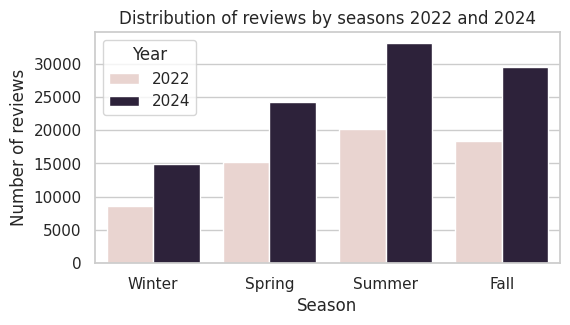

In [48]:
sns.set(style="whitegrid")

plt.figure(figsize=(6,3))
sns.countplot(data=combined, x='season', hue='year', order=['Winter', 'Spring', 'Summer', 'Fall'])
plt.title("Distribution of reviews by seasons 2022 and 2024")
plt.ylabel("Number of reviews")
plt.xlabel("Season")
plt.legend(title="Year")
plt.show()

# Calculating the total number of reviews per user (reviewer_total_reviews) 

## 2022 Year

In [49]:
reviewer_counts_2022 = Chicago_reviews_2022.groupby('reviewer_id')['id_review'].count().reset_index()
reviewer_counts_2022.rename(columns={'id_review': 'reviewer_total_reviews'}, inplace=True)

Chicago_reviews_2022 = Chicago_reviews_2022.merge(reviewer_counts_2022, on='reviewer_id', how='left')

## 2024 Year

In [50]:
reviewer_counts_2024 = Chicago_reviews_2024.groupby('reviewer_id')['id_review'].count().reset_index()
reviewer_counts_2024.rename(columns={'id_review': 'reviewer_total_reviews'}, inplace=True)

Chicago_reviews_2024 = Chicago_reviews_2024.merge(reviewer_counts_2024, on='reviewer_id', how='left')

In [51]:
print("Example 2022:")
display(Chicago_reviews_2022[['reviewer_id', 'reviewer_total_reviews']].head())

Example 2022:


,reviewer_id,reviewer_total_reviews
0,153590859,1
1,103271804,2
2,138753984,1
3,54621446,1
4,103271804,2


In [52]:
print("Example 2024:")
display(Chicago_reviews_2024[['reviewer_id', 'reviewer_total_reviews']].head())

Example 2024:


,reviewer_id,reviewer_total_reviews
0,66242769,2
1,365979132,1
2,11840900,1
3,562908443,1
4,25190107,1


### Visualisation

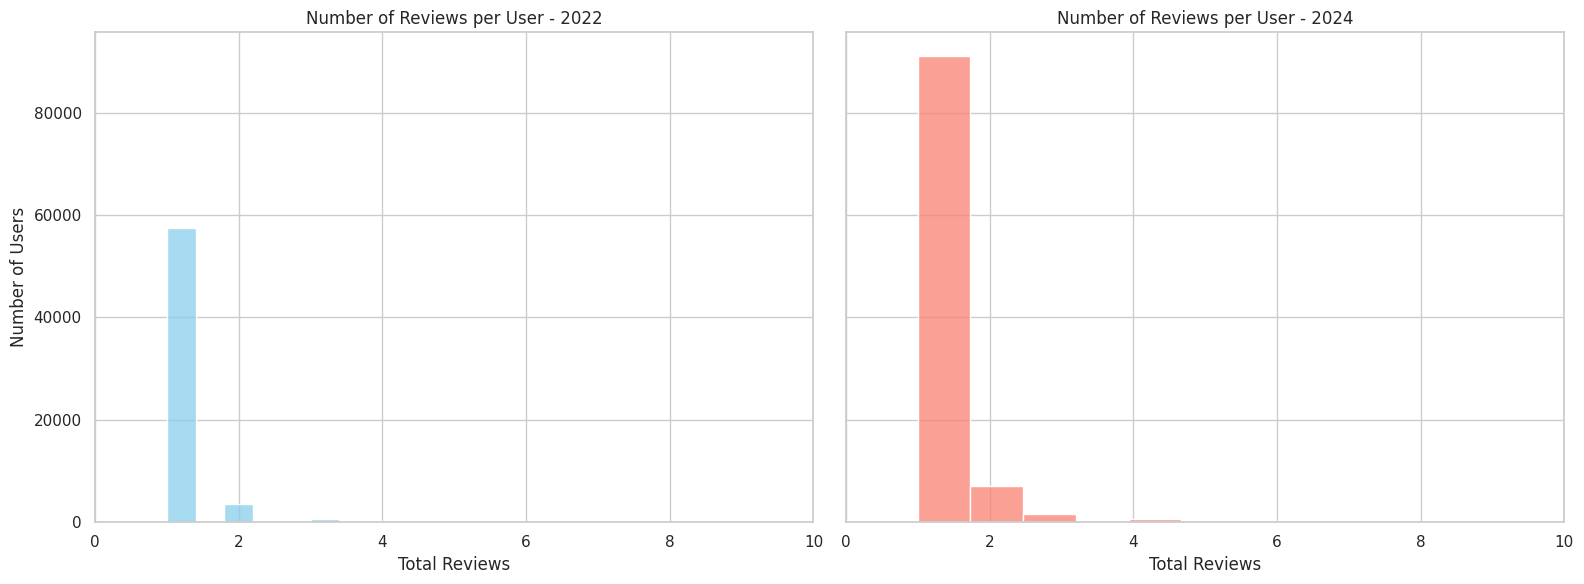

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Style
sns.set(style="whitegrid")

# Create a figure and axes
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# 2022
sns.histplot(Chicago_reviews_2022['reviewer_total_reviews'], bins=30, ax=axes[0], color='skyblue')
axes[0].set_title('Number of Reviews per User - 2022')
axes[0].set_xlabel('Total Reviews')
axes[0].set_ylabel('Number of Users')
axes[0].set_xlim(0, 10)
# 2024
sns.histplot(Chicago_reviews_2024['reviewer_total_reviews'], bins=30, ax=axes[1], color='salmon')
axes[1].set_title('Number of Reviews per User - 2024')
axes[1].set_xlabel('Total Reviews')
axes[1].set_ylabel('')
axes[1].set_xlim(0, 10)

plt.tight_layout()
plt.show()

# Business status (business_status)

Create last_reviews based on combined data

In [54]:
combined = pd.concat([Chicago_reviews_2022[['listing_id','date']], 
                      Chicago_reviews_2024[['listing_id','date']]], ignore_index=True)

last_reviews = combined.groupby('listing_id')['date'].max().reset_index()
last_reviews.rename(columns={'date': 'last_review'}, inplace=True)

Find last review per listing

In [55]:
last_reviews = combined.groupby('listing_id')['date'].max().reset_index()
last_reviews.rename(columns={'date': 'last_review'}, inplace=True)

Merge last review date with both datasets

In [56]:
Chicago_reviews_2022 = Chicago_reviews_2022.merge(last_reviews, on='listing_id', how='left')
Chicago_reviews_2024 = Chicago_reviews_2024.merge(last_reviews, on='listing_id', how='left')

Convert to datetime

In [57]:
Chicago_reviews_2022['last_review'] = pd.to_datetime(Chicago_reviews_2022['last_review'])
Chicago_reviews_2024['last_review'] = pd.to_datetime(Chicago_reviews_2024['last_review'])

Business status rules

In [58]:
Chicago_reviews_2022['business_status'] = np.where(
    Chicago_reviews_2022['last_review'].isna(), 'No Reviews',
    np.where(Chicago_reviews_2022['last_review'] < pd.Timestamp('2022-01-01'), 'Shuttered', 'Active')
)

Chicago_reviews_2024['business_status'] = np.where(
    Chicago_reviews_2024['last_review'].isna(), 'No Reviews',
    np.where(Chicago_reviews_2024['last_review'] < pd.Timestamp('2022-01-01'), 'Shuttered', 'Active')
)

Count listings by business status

In [59]:
status_2022 = Chicago_reviews_2022['business_status'].value_counts().reset_index()
status_2022.columns = ['business_status', 'count'] 
status_2022['year'] = 2022

status_2024 = Chicago_reviews_2024['business_status'].value_counts().reset_index()
status_2024.columns = ['business_status', 'count']
status_2024['year'] = 2024

Combine

In [60]:
status_all_correct = pd.concat([status_2022, status_2024], ignore_index=True)

### Visualisation

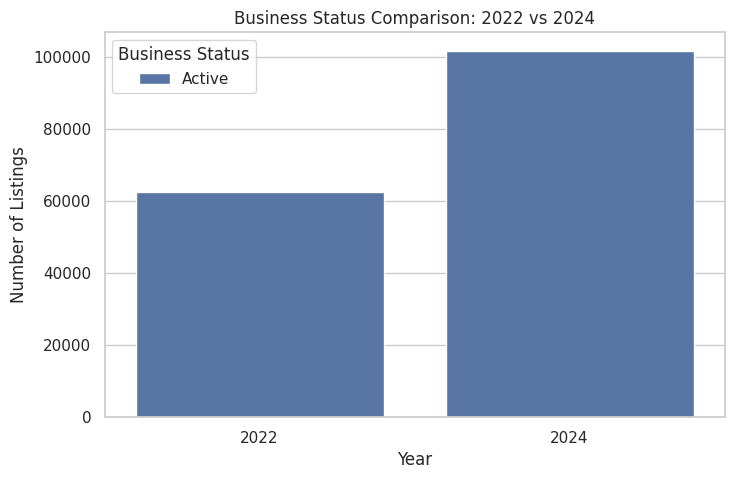

In [61]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(data=status_all_correct, x='year', y='count', hue='business_status')
plt.title('Business Status Comparison: 2022 vs 2024')
plt.ylabel('Number of Listings')
plt.xlabel('Year')
plt.legend(title='Business Status')
plt.show()

Operational status specifically for 2024

In [62]:
Chicago_reviews_2024['operational_2024'] = np.where(
    Chicago_reviews_2024['last_review'] >= pd.Timestamp("2024-01-01"),
    'Still operating in 2024',
    'No evidence of activity in 2024'
)

Chicago_reviews_2024['operational_2024'] = 'Still operating in 2024'

# Identifying significant features for analysis

Compute numeric and amenity features

In [63]:
for df in [Chicago_reviews_2022, Chicago_reviews_2024]:
    # Convert price to numeric
    df['price_num'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
    
    # Count amenities if column exists
    if 'amenities' in df.columns:
        df['amenities_count'] = df['amenities'].apply(lambda x: len(eval(x)) if pd.notna(x) else 0)
    else:
        df['amenities_count'] = 0  # fallback if column missing

Define salient features

In [64]:
salient_features = ['accommodates', 'bedrooms', 'beds', 'property_type', 'amenities_count', 'price_num']

Summarize numeric features

In [65]:
sample_size = 50000 
summary_2022 = Chicago_reviews_2022[salient_features].sample(sample_size, random_state=42).describe().T
summary_2024 = Chicago_reviews_2024[salient_features].sample(sample_size, random_state=42).describe().T

Add year column

In [66]:
summary_2022['year'] = 2022
summary_2024['year'] = 2024

Combine summaries

In [67]:
summary_all = pd.concat([summary_2022, summary_2024])
display(summary_all)

,count,mean,std,min,25%,50%,75%,max,year
accommodates,50000.0,4.826100,3.086469,1.0,2.0,4.0,6.0,16.0,2022
bedrooms,49284.0,1.869004,1.221176,0.0,1.0,2.0,3.0,13.0,2022
beds,46526.0,2.563921,1.838869,0.0,1.0,2.0,3.0,19.0,2022
amenities_count,50000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2022
price_num,46429.0,216.929268,200.998514,18.0,105.0,156.0,254.0,2643.0,2022
accommodates,50000.0,5.015660,3.166849,1.0,2.0,4.0,6.0,16.0,2024
bedrooms,49512.0,1.938096,1.227387,0.0,1.0,2.0,3.0,13.0,2024
beds,46632.0,2.662807,1.862174,0.0,1.0,2.0,3.0,19.0,2024
amenities_count,50000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2024
price_num,46624.0,338.850077,2274.736758,18.0,111.0,169.0,272.0,50109.0,2024


Visualize numeric features

In [68]:
numeric_features = ['accommodates', 'bedrooms', 'beds', 'price_num']

Combine data for plotting

In [69]:
Chicago_reviews_2022['year'] = 2022
Chicago_reviews_2024['year'] = 2024
df_combined = pd.concat([Chicago_reviews_2022, Chicago_reviews_2024], ignore_index=True)

Boxplots

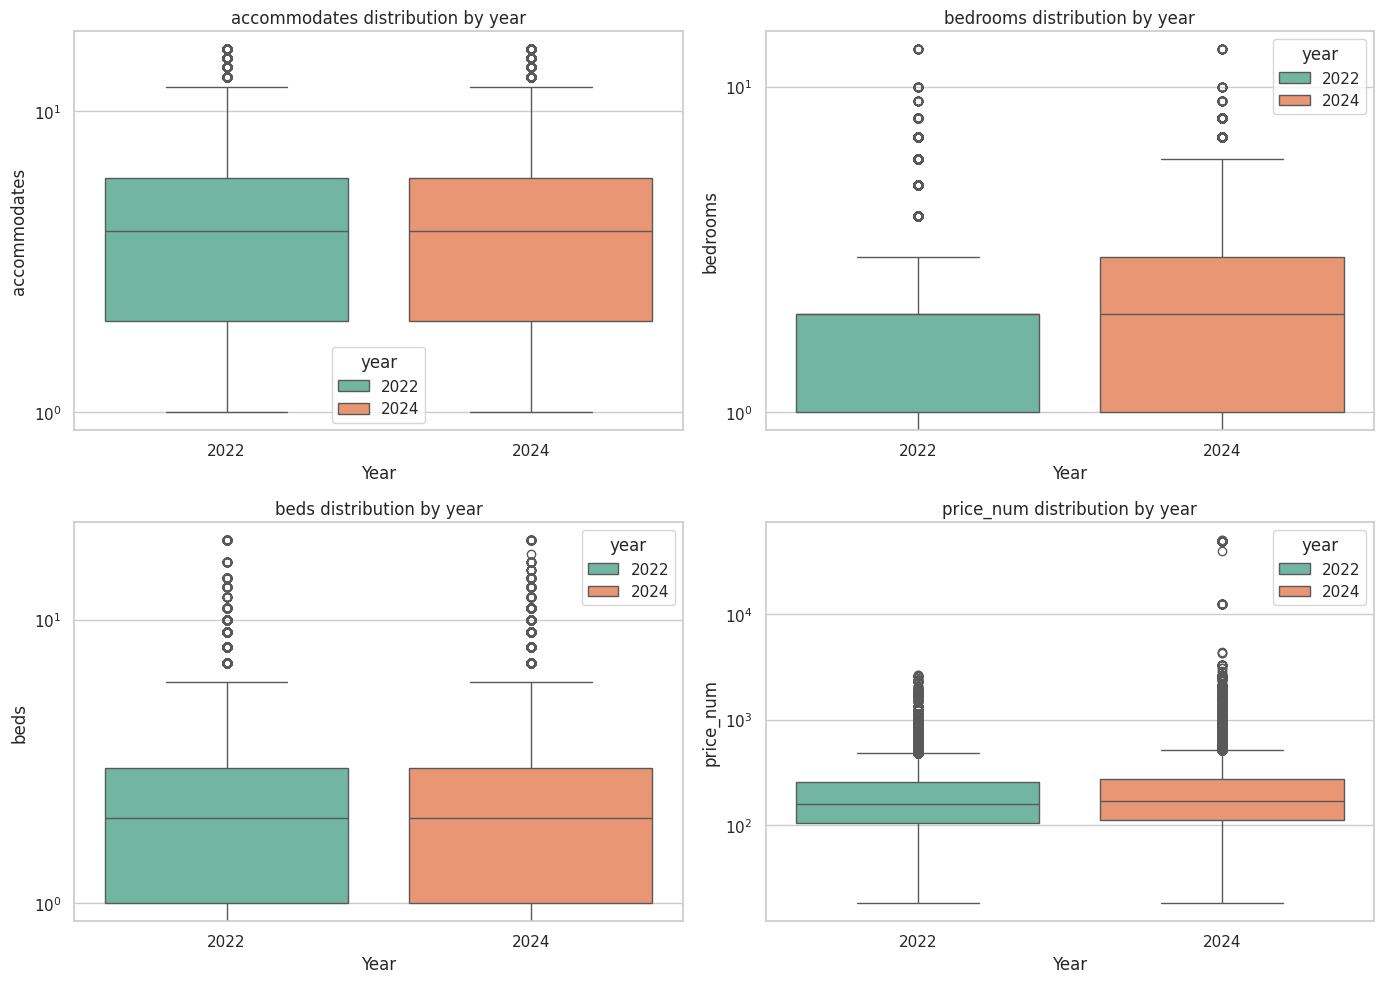

In [70]:
fig, axes = plt.subplots(2, 2, figsize=(14,10))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.boxplot(
        data=df_combined,
        x='year',
        y=feature,
        hue='year',      # explicitly specify hue
        dodge=False,     # avoid separate boxes for each hue
        palette='Set2',
        ax=axes[i]
    )
    axes[i].set_title(f'{feature} distribution by year')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(feature)
    axes[i].set_yscale('log')  # optional for outliers

plt.tight_layout()
plt.show()

# Saving the final dataframe

Define the columns to save

In [71]:
final_columns = [
    'listing_id', 'id_review', 'date', 'reviewer_id', 'reviewer_name', 'comments',
    'language', 'year', 'season', 'reviewer_total_reviews', 'name', 'property_type', 
    'room_type', 'neighbourhood_cleansed', 'latitude', 'longitude', 'host_id', 
    'host_total_listings_count', 'host_name', 'number_of_reviews', 'review_scores_rating',
    'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
    'review_scores_communication','review_scores_location','review_scores_value',
    'accommodates','bedrooms','beds','price_num','amenities_count','business_status', 
    'establishment_type', 'city'
]

Ensure missing columns exist

In [73]:
for col in final_columns:
    if col not in Chicago_reviews_2022.columns:
        Chicago_reviews_2022[col] = np.nan
    if col not in Chicago_reviews_2024.columns:
        Chicago_reviews_2024[col] = np.nan

Select columns

In [76]:
Chicago_reviews_2022_final = Chicago_reviews_2022[final_columns].copy()
Chicago_reviews_2024_final = Chicago_reviews_2024[final_columns].copy()

Save as Parquet

In [77]:
Chicago_reviews_2022_final.to_parquet("../data/processed/Chicago_airbnb_reviews_2022_clean.parquet", index=False)
Chicago_reviews_2024_final.to_parquet("../data/processed/Chicago_airbnb_reviews_2024_clean.parquet", index=False)

Save as CSV

In [78]:
Chicago_reviews_2022_final.to_csv("../data/processed/Chicago_airbnb_reviews_2022_clean.csv", index=False)
Chicago_reviews_2024_final.to_csv("../data/processed/Chicago_airbnb_reviews_2022_clean.csv", index=False)

In [79]:
Chicago_reviews_2022_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62396 entries, 0 to 62395
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   listing_id                   62396 non-null  int64         
 1   id_review                    62396 non-null  int64         
 2   date                         62396 non-null  datetime64[ns]
 3   reviewer_id                  62396 non-null  int64         
 4   reviewer_name                62396 non-null  object        
 5   comments                     62396 non-null  object        
 6   language                     62396 non-null  object        
 7   year                         62396 non-null  int64         
 8   season                       62396 non-null  object        
 9   reviewer_total_reviews       62396 non-null  int64         
 10  name                         62396 non-null  object        
 11  property_type                62396 non-nu

In [80]:
Chicago_reviews_2022_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62396 entries, 0 to 62395
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   listing_id                   62396 non-null  int64         
 1   id_review                    62396 non-null  int64         
 2   date                         62396 non-null  datetime64[ns]
 3   reviewer_id                  62396 non-null  int64         
 4   reviewer_name                62396 non-null  object        
 5   comments                     62396 non-null  object        
 6   language                     62396 non-null  object        
 7   year                         62396 non-null  int64         
 8   season                       62396 non-null  object        
 9   reviewer_total_reviews       62396 non-null  int64         
 10  name                         62396 non-null  object        
 11  property_type                62396 non-nu